In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [ ]:
dataset = pd.read_csv("obesity.csv")
temp = dataset
print("Classes in the dataset:", dataset['NObeyesdad'].unique())

Classes in the dataset: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [ ]:
categories = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
for c in categories:
  dummies = pd.get_dummies(dataset[c], prefix=(str(c)+"_"))
  dataset = pd.concat([dataset, dummies], axis=1)
dataset = dataset.drop(columns=categories)

In [ ]:
# Exploratory Data Analysis:
display(dataset)
#obtaining data summary
print('Size of the dataset and the number of features are:')
print(dataset.shape)
print('\nColumn names in the dataset:')
print(dataset.columns)

Age    Height      Weight  FCVC  NCP      CH2O       FAF  \
0     21.000000  1.620000   64.000000   2.0  3.0  2.000000  0.000000   
1     21.000000  1.520000   56.000000   3.0  3.0  3.000000  3.000000   
2     23.000000  1.800000   77.000000   2.0  3.0  2.000000  2.000000   
3     27.000000  1.800000   87.000000   3.0  3.0  2.000000  2.000000   
4     22.000000  1.780000   89.800000   2.0  1.0  2.000000  0.000000   
...         ...       ...         ...   ...  ...       ...       ...   
2106  20.976842  1.710730  131.408528   3.0  3.0  1.728139  1.676269   
2107  21.982942  1.748584  133.742943   3.0  3.0  2.005130  1.341390   
2108  22.524036  1.752206  133.689352   3.0  3.0  2.054193  1.414209   
2109  24.361936  1.739450  133.346641   3.0  3.0  2.852339  1.139107   
2110  23.664709  1.738836  133.472641   3.0  3.0  2.863513  1.026452   

           TUE  Gender__Female  Gender__Male  ...  MTRANS__Motorbike  \
0     1.000000               1             0  ...                  0   
1     0.000000               1             0  ...                  0   
2     1.000000               0             1  ...                  0   
3     0.000000               0             1  ...                  0   
4     0.000000               0             1  ...                  0   
...        ...             ...           ...  ...                ...   
2106  0.906247               1             0  ...                  0   
2107  0.599270               1             0  ...                  0   
2108  0.646288               1             0  ...                  0   
2109  0.586035               1             0  ...                  0   
2110  0.714137               1             0  ...                  0   

      MTRANS__Public_Transportation  MTRANS__Walking  \
0                                 1                0   
1                                 1                0   
2                                 1                0   
3                                 0                1   
4                                 1                0   
...                             ...              ...   
2106                              1                0   
2107                              1                0   
2108                              1                0   
2109                              1                0   
2110                              1                0   

      NObeyesdad__Insufficient_Weight  NObeyesdad__Normal_Weight  \
0                                   0                          1   
1                                   0                          1   
2                                   0                          1   
3                                   0                          0   
4                                   0                          0   
...                               ...                        ...   
2106                                0                          0   
2107                                0                          0   
2108                                0                          0   
2109                                0                          0   
2110                                0                          0   

      NObeyesdad__Obesity_Type_I  NObeyesdad__Obesity_Type_II  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   
...                          ...                          ...   
2106                           0                            0   
2107                           0                            0   
2108                           0                            0   
2109                           0                            0   
2110                           0                            0   

      NObey

Size of the dataset and the number of features are:
(2111, 38)

Column names in the dataset:
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender__Female', 'Gender__Male', 'family_history_with_overweight__no',
       'family_history_with_overweight__yes', 'FAVC__no', 'FAVC__yes',
       'SMOKE__no', 'SMOKE__yes', 'SCC__no', 'SCC__yes', 'CAEC__Always',
       'CAEC__Frequently', 'CAEC__Sometimes', 'CAEC__no', 'CALC__Always',
       'CALC__Frequently', 'CALC__Sometimes', 'CALC__no', 'MTRANS__Automobile',
       'MTRANS__Bike', 'MTRANS__Motorbike', 'MTRANS__Public_Transportation',
       'MTRANS__Walking', 'NObeyesdad__Insufficient_Weight',
       'NObeyesdad__Normal_Weight', 'NObeyesdad__Obesity_Type_I',
       'NObeyesdad__Obesity_Type_II', 'NObeyesdad__Obesity_Type_III',
       'NObeyesdad__Overweight_Level_I', 'NObeyesdad__Overweight_Level_II'],
      dtype='object')


In [ ]:
# Checking balance of data
nobeyesdad_list = ["NObeyesdad__Insufficient_Weight", "NObeyesdad__Normal_Weight",
                   "NObeyesdad__Obesity_Type_I", "NObeyesdad__Obesity_Type_II",
                   "NObeyesdad__Obesity_Type_III", "NObeyesdad__Overweight_Level_I",
                   "NObeyesdad__Overweight_Level_II"]
print('\nNumber of samples for each obesity level:')
for level in nobeyesdad_list:
  print(dataset[level].value_counts())


Number of samples for each obesity level:
0    1839
1     272
Name: NObeyesdad__Insufficient_Weight, dtype: int64
0    1824
1     287
Name: NObeyesdad__Normal_Weight, dtype: int64
0    1760
1     351
Name: NObeyesdad__Obesity_Type_I, dtype: int64
0    1814
1     297
Name: NObeyesdad__Obesity_Type_II, dtype: int64
0    1787
1     324
Name: NObeyesdad__Obesity_Type_III, dtype: int64
0    1821
1     290
Name: NObeyesdad__Overweight_Level_I, dtype: int64
0    1821
1     290
Name: NObeyesdad__Overweight_Level_II, dtype: int64


<Axes: >

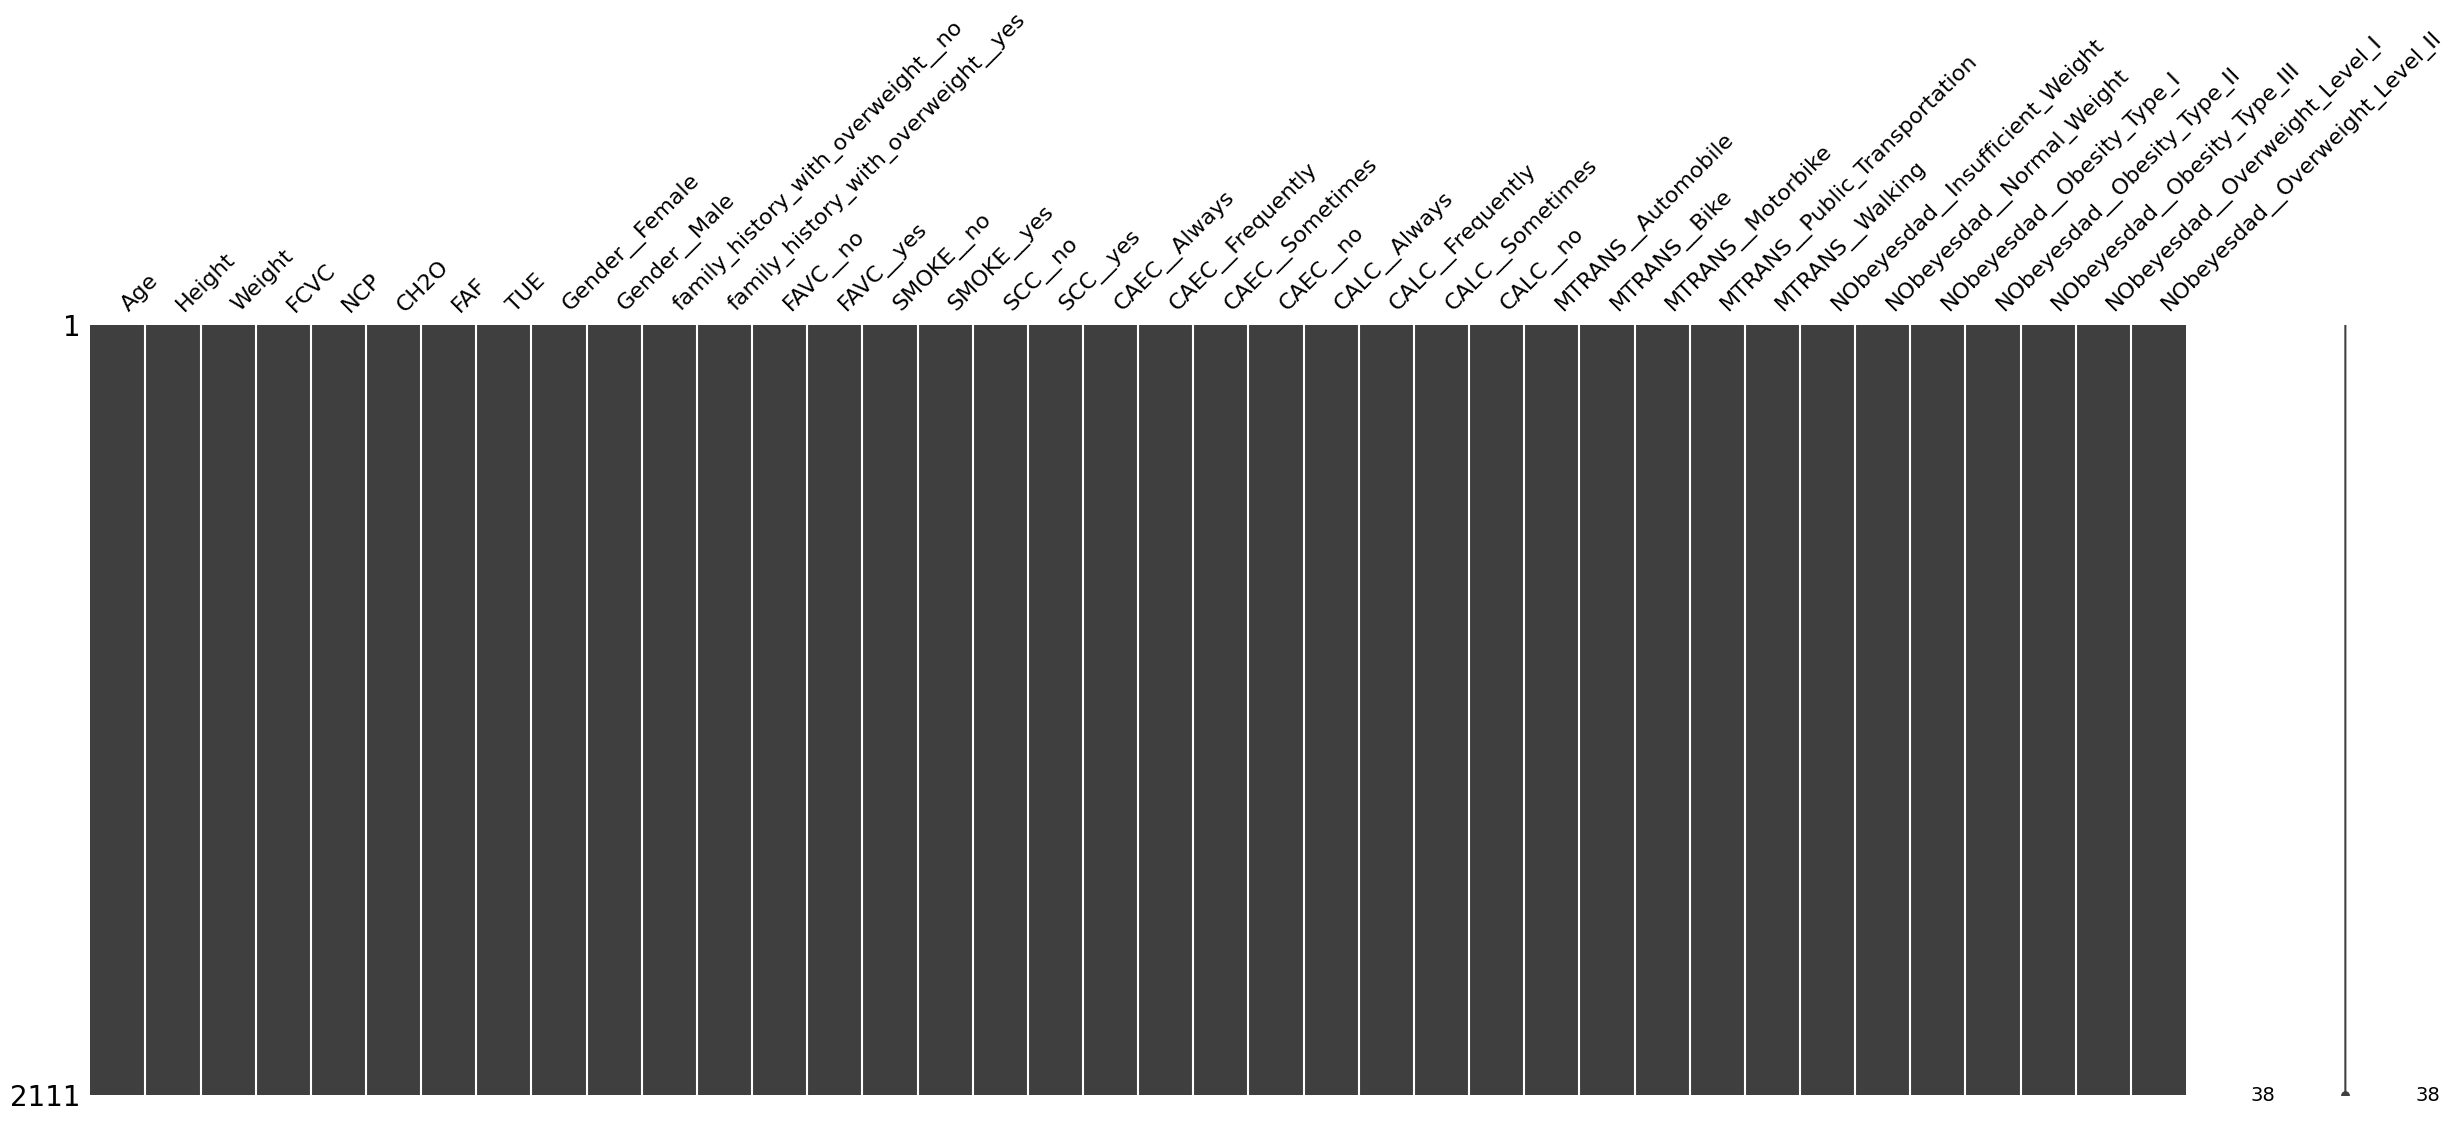

In [ ]:
# Checking for missing data - There appears to be no missing data
msno.matrix(dataset, figsize=(30, 10))

<Axes: >

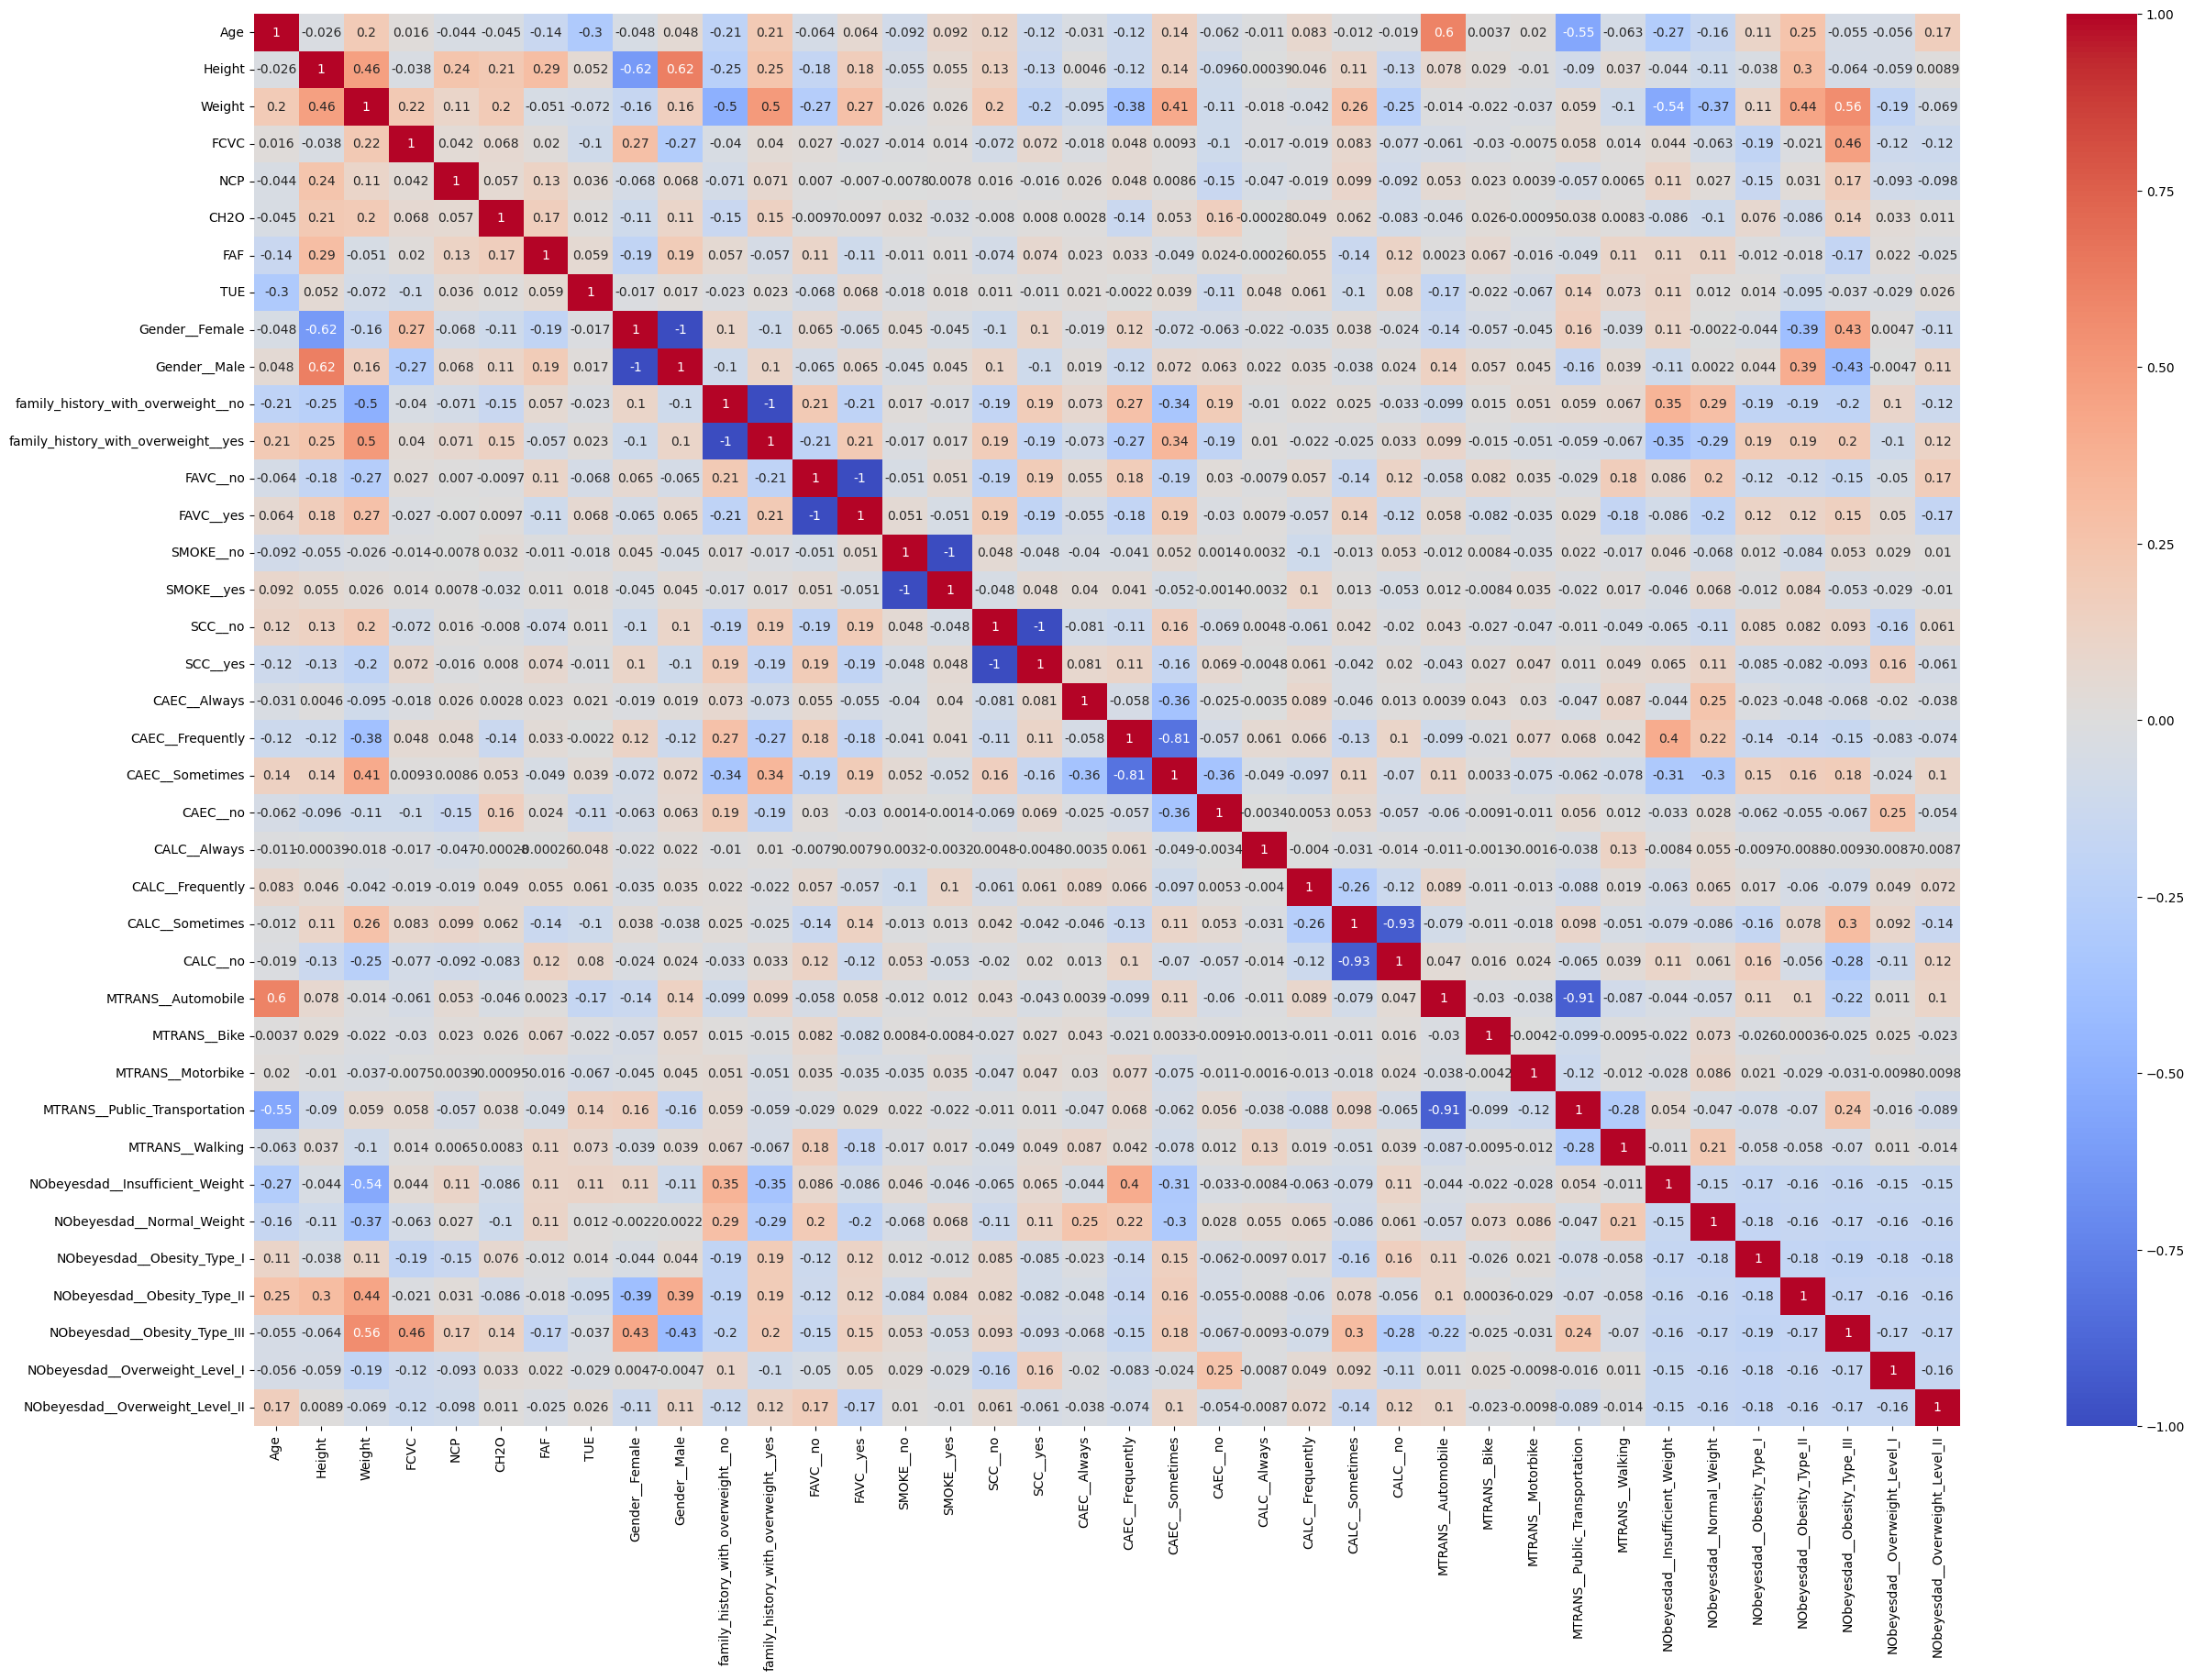

In [ ]:
# Correlation Matrix
plt.figure(figsize=(30, 20))
sns.heatmap(dataset.corr(), annot = True, fmt='0.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

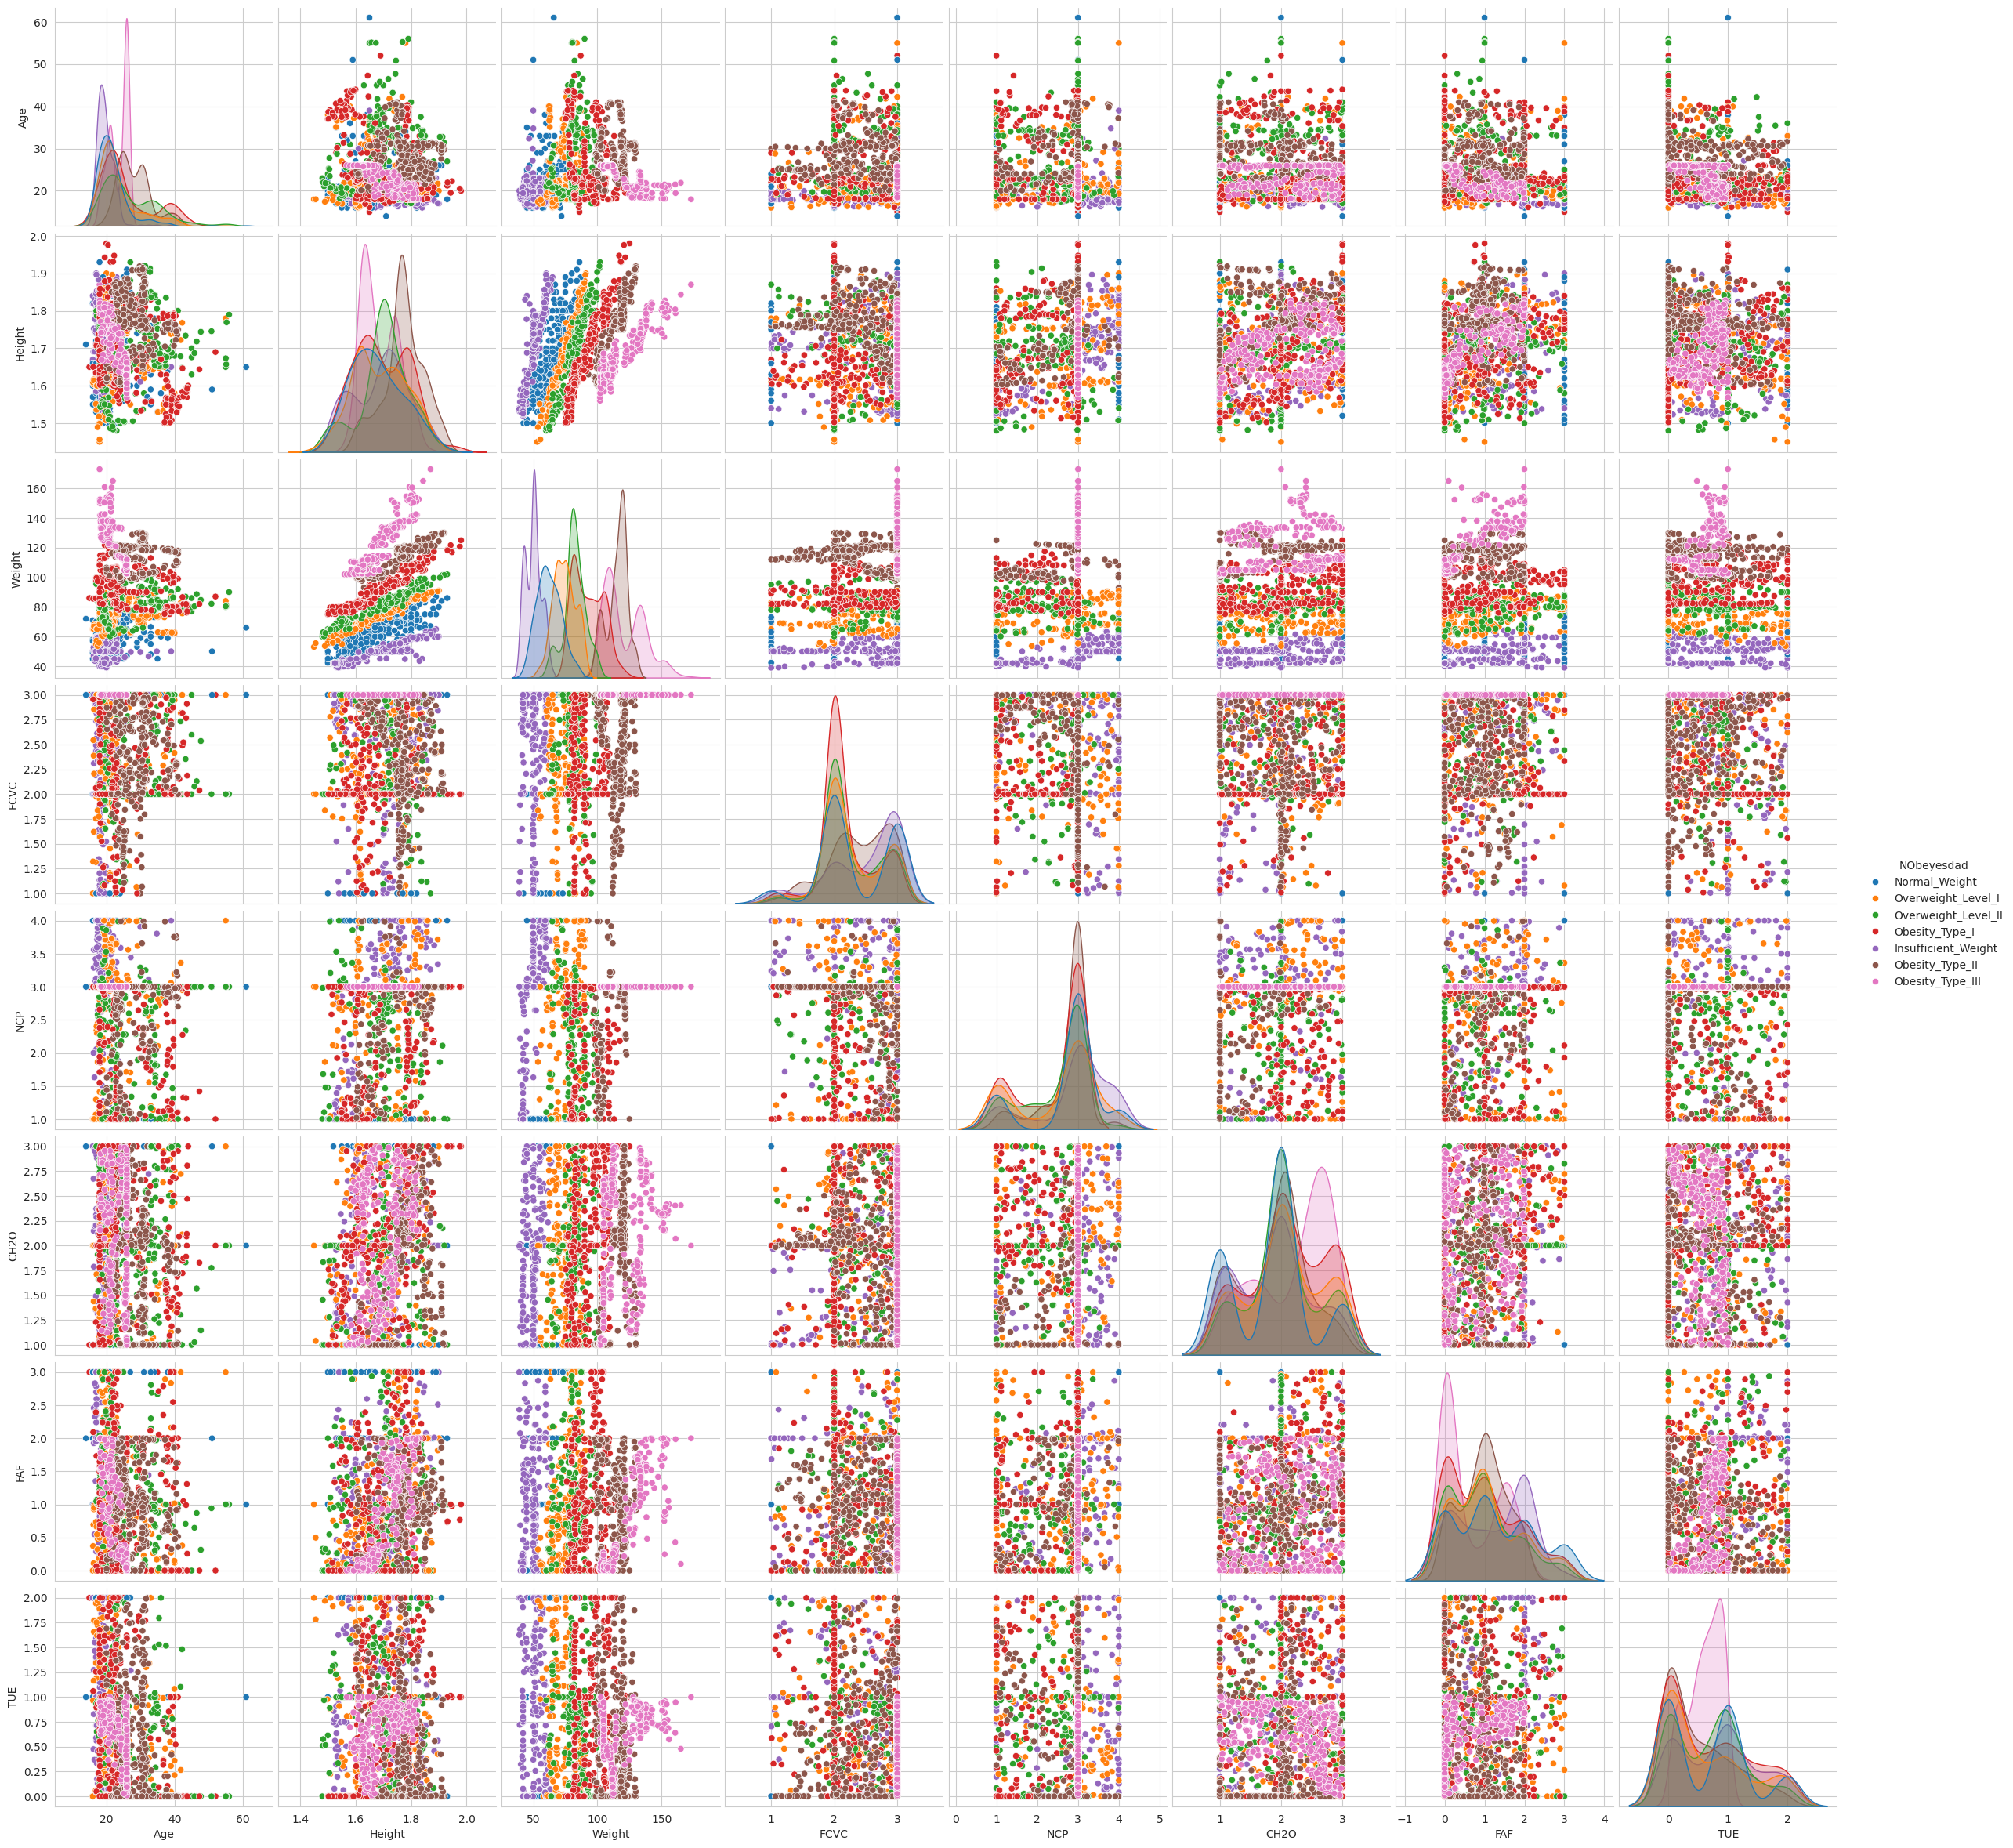

In [ ]:
# Pairplot
dataset_copy = pd.read_csv("obesity.csv")
sns.set_style("whitegrid")
sns.pairplot(dataset_copy, hue="NObeyesdad", height=3)
plt.show()

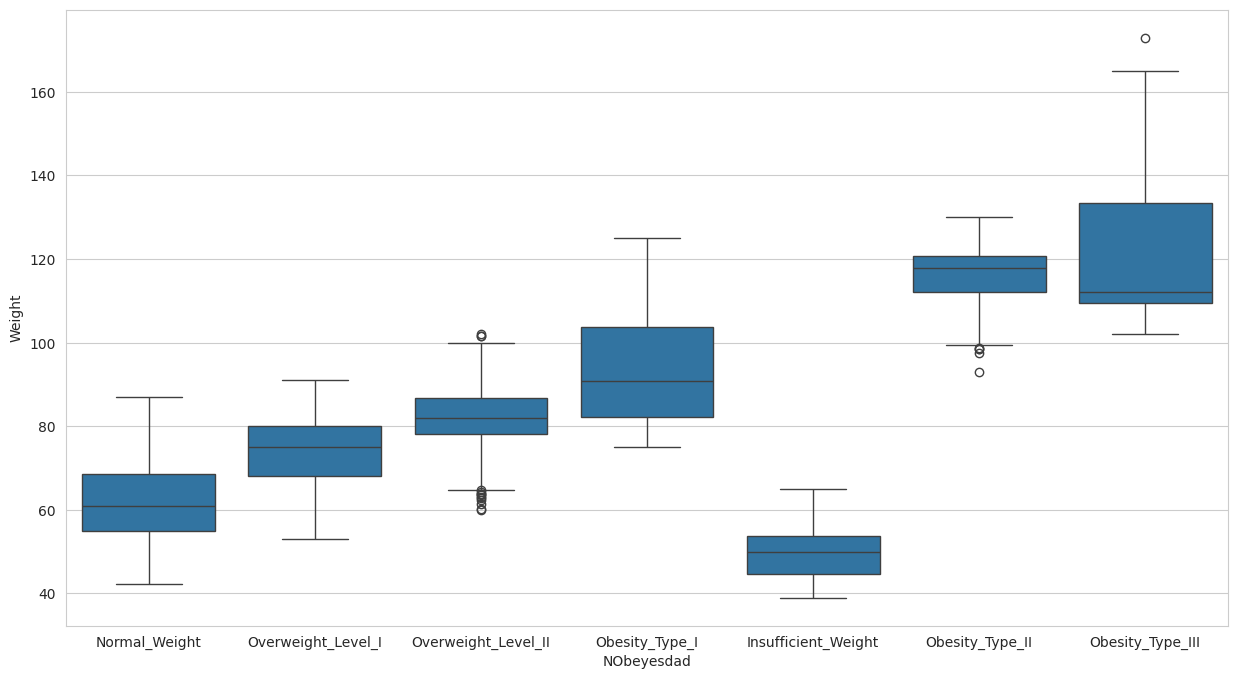

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='NObeyesdad',y='Weight', data=dataset_copy)
plt.show()

### Correlation Matrix
Looking at the NObeyesdad columns (the variable we're trying to predict), the strongest correlation values come from:
- Insufficient Weight: CAEC, Weight, family_history_with_overweight
- Normal Weight: CAEC, Weight, family_history_with_overweight
- Obesity Type 1: None. The relationship between Obesity Type 1 and the other variables may be nonlinear.
- Obesity Type 2: Gender, Height, Weight
- Obesity Type 3: Gender, FCVC, CALC, Weight
- Overweight Level 1: None. The relationship between Overweight Level 1 and the other variables may be nonlinear.
- Overweight Level 2: None. The relationship between Overweight Level 2 and the other variables may be nonlinear.

Weight has a very high correlation in predicting obesity across more than half of the levels indicating that it is a very influential variable in predicting NObeyesdad.


### Pairplot

*   The clearest relationship is between height and weight. These variables are clearly linearly distributed, with distinct lines for each level of obesity. Thus, weight and height are likely the most helpful in identifing the classes from one another.
*   The weight column has the most clear and distinct patterns. This further proves that weight is an influential variable and is very informative in predicting NObeyesdad

### Boxplot
We can further examine weight in a boxplot.
*   The boxes for different levels of obesity are at different heights, meaning that there is a difference in the central tendency for the different levels.
*   The plots seem relatively symmetric, with Obesity Type III being the most right skewed.
*   There are a few outliers for Overweight Level II, Obesity Type II, and Obesity Type III.

